In [45]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft
%matplotlib widget

In [41]:
path = r'C:\Users\Manvydas\Downloads\OneDrive_2023-09-28\1 praktinė užduotis Furjė analizė'
names = os.listdir(path)
namesspectra = [x for x in names if '.dat' in x or '.DPT' in x]
print(namesspectra)

['interf maza.dat', 'interferencija.dat', 'interferograma didele.DPT']


interferencija.dat
[  0.         +0.j         -89.63644915+34.86562068j
  45.92211198-53.53817895j ...  14.17183512-90.96605482j
  45.92211198+53.53817895j -89.63644915-34.86562068j]


C:\Users\Manvydas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


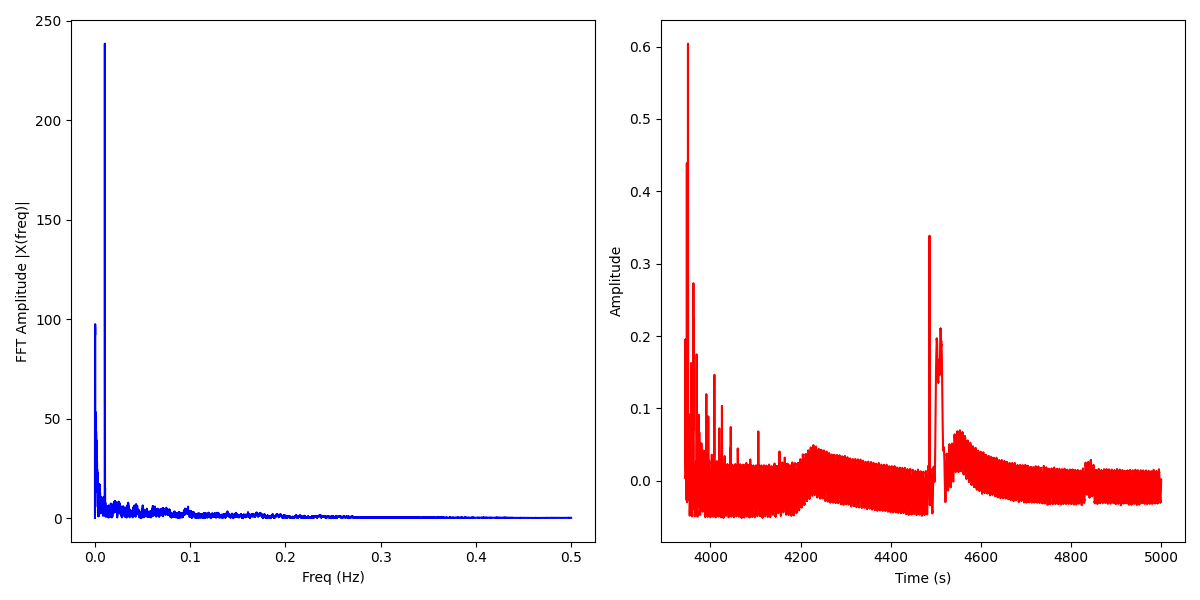

In [ ]:
plt.close()
Y=1
x = namesspectra[Y]
print(x)
# get the sampling rate
sr = 1 
cut_off = 0.00001

df = pd.DataFrame()
df = pd.read_csv(path + '\\' + x, delimiter="\t", decimal=".", names = ['a', 'b'])


sig_fft = fft(df['b'])
sig_fft_filtered = sig_fft.copy()
N = df['a'].shape[-1]
n = np.arange(N)
T = N/sr
freq = n/T

# print(yf)
sig_fft_filtered[np.abs(freq) < cut_off] = 0
print(sig_fft_filtered)
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.plot(f_oneside, np.abs(sig_fft_filtered[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
# plt.xlim(0, 10)

plt.subplot(122)
plt.plot(df['a'], ifft(sig_fft_filtered), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


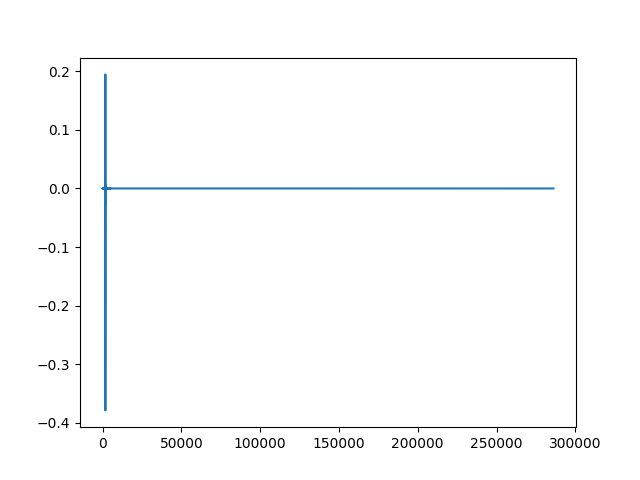

In [43]:
plt.close()
plt.plot(df['a'], df['b'])
plt.show()